In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [4]:
hf.keys()

<KeysViewHDF5 ['data']>

In [5]:
data = np.array(hf.get('data'))

In [6]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [7]:
hf.close()

$\textbf{Problem 1}$

In this problem we are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

As with most data, there are 'features.' Your lab instructor has helpfully incorporated the meta-data into your data file.

$\textbf{1)}$ Download the data from the course website (gammaray_lab4.h5), and import it into your working environment. The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. Make a few plots, generally exploring your data and making sure you understand it. Give a high level description of the data features you see. Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().

Below, I will first explore the data as a function of time, with each of the respective parameters. (Count vs time, Longtidue vs time, Solar phase vs time). This should help better visualize the periodicity of the data, although note that the time graph is severely trimmed to better accentuate the shape of the periodicity (In reality, there is more than 25 million values, and the graphs are limited to 250,000). To construct a background pdf, I will approximate the shape of the exponential curve that is shown on the Particle count vs time graph below, with appropriate parameters.  

Text(0.5, 1.0, 'Particle count vs time')

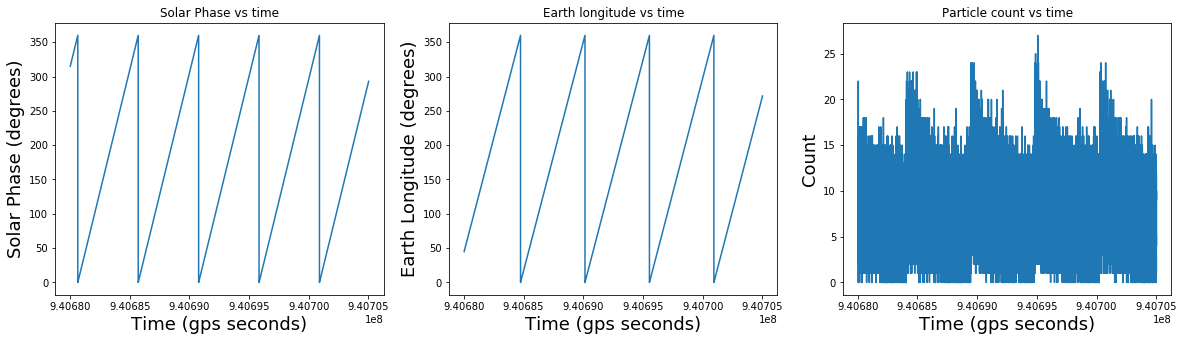

In [133]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

ax[0].set_ylabel("Solar Phase (degrees)", fontsize = 18)
ax[0].set_xlabel("Time (gps seconds)", fontsize = 18)
ax[0].plot(data[0,:][0:250000],data[1,:][0:250000])
ax[0].set_title("Solar Phase vs time")

ax[1].set_ylabel("Earth Longitude (degrees)", fontsize = 18)
ax[1].set_xlabel("Time (gps seconds)", fontsize = 18)
ax[1].plot(data[0,:][0:250000],data[2,:][0:250000])
ax[1].set_title("Earth longitude vs time")

ax[2].set_ylabel("Count", fontsize = 18)
ax[2].set_xlabel("Time (gps seconds)", fontsize = 18)
ax[2].plot(data[0,:][0:250000],data[3,:][0:250000])
ax[2].set_title("Particle count vs time")


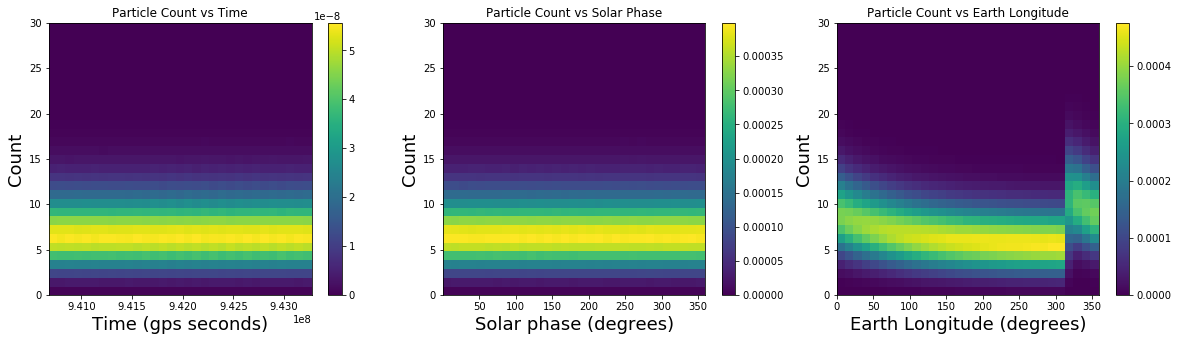

In [139]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_ylabel("Count", fontsize = 18)
ax[0].set_xlabel("Time (gps seconds)", fontsize = 18)
ax[0].set_title("Particle Count vs Time")
#plt.title("2D density histogram of Count vs Time", fontsize=20)
a = np.vstack((data[0], data[3]))
h = ax[0].hist2d(a[0,:],a[1,:],bins=31, density=True);
clb = plt.colorbar(h[3], ax=ax[0])

ax[1].set_ylabel("Count", fontsize = 18)
ax[1].set_xlabel("Solar phase (degrees)", fontsize = 18)
ax[1].set_title("Particle Count vs Solar Phase")
#plt.title("2D density histogram of Count vs Solar Phase", fontsize=20)
a = np.vstack((data[1], data[3]))
h = ax[1].hist2d(a[0,:],a[1,:],bins=31, density=True);
clb = plt.colorbar(h[3], ax=ax[1])

ax[2].set_ylabel("Count", fontsize = 18)
ax[2].set_xlabel("Earth Longitude (degrees)", fontsize = 18)
ax[2].set_title("Particle Count vs Earth Longitude")
#plt.title("2D density histogram of Count vs Earth Longitude", fontsize=20)
a = np.vstack((data[2], data[3]))
h = ax[2].hist2d(a[0,:],a[1,:],bins=31, density=True);
clb = plt.colorbar(h[3], ax=ax[2])

When looking at the particle data, we find that it looks very similar to a Poisson distribution. As shown below, a Poisson distribution with a mean slightly higher than the mean of our particle count data is a pretty good fit for our particle count data. Note that +0.7 was chosen arbitarily, because it makes a better fit than a shape parameter exactly equal to the mean.

In [140]:
mean = np.mean(data[3])
print(mean)

7.09730524315952


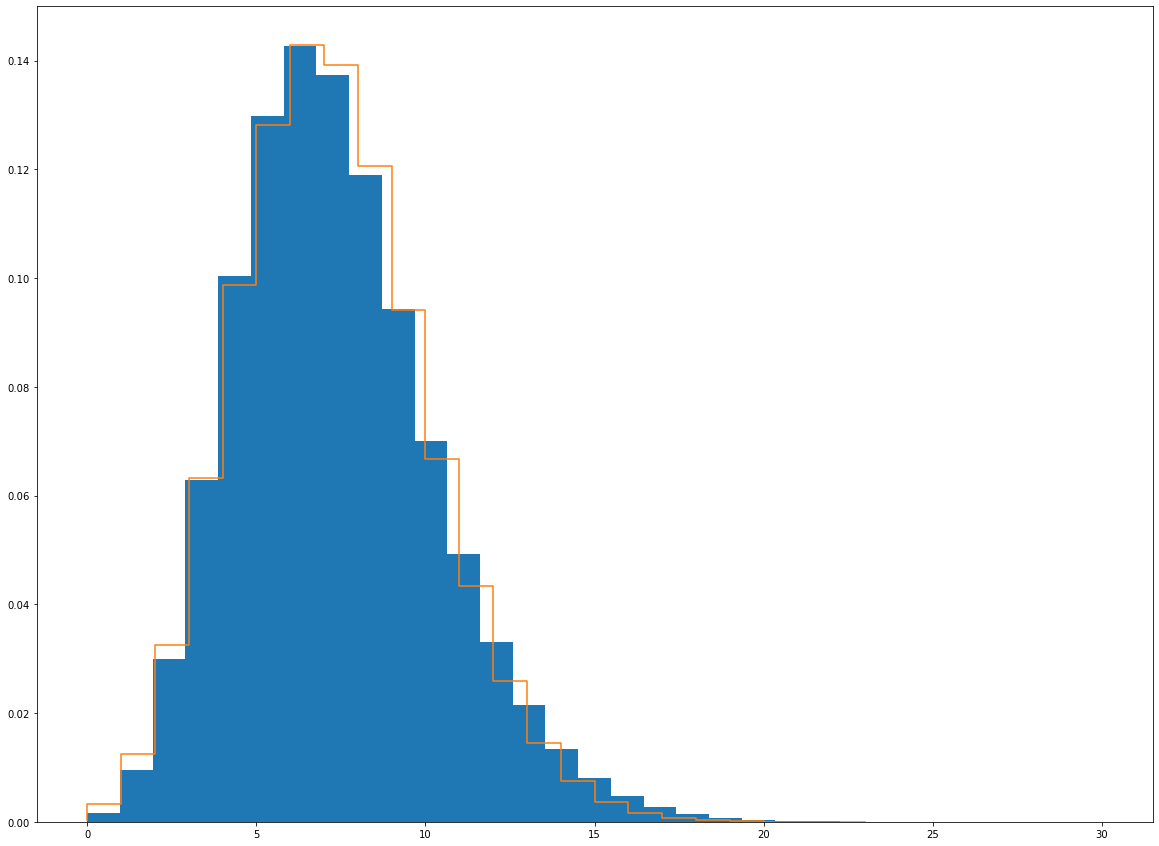

In [141]:
fig, ax = plt.subplots(1, 1)
ax.hist(data[3], bins = 31, density = True)
x = np.arange(stats.poisson.ppf(0.000001, mean + 0.7),
              stats.poisson.ppf(0.999999, mean + 0.7)) 
ax.step(x, stats.poisson.pmf(x, mean + 0.7))

$\textbf{2)}$ The background is not consistent across the dataset. Find and describe as accurately as you can how the background changes.

As shown in the Earth Longitude & Solar Phase vs Time graphs above, there is an apparent periodicity in the data of around $(9.40695-9.40690)*(1e8) \approx 5000$ seconds or so. As stated in the problem, the Satellite collecting these measurements has an orbit of about 90 minutes (5400 seconds). As such, we can conclude that the periodicity in the data is a direct consequence of this orbital period. By looking at the graph of Count vs Time, we can see that the values of our data points rapidly increases over a very short timescale, and then decays exponentially before spiking back up. (The previous graph is repeated for reference, below.)

Text(0.5, 1.0, 'Particle count vs time')

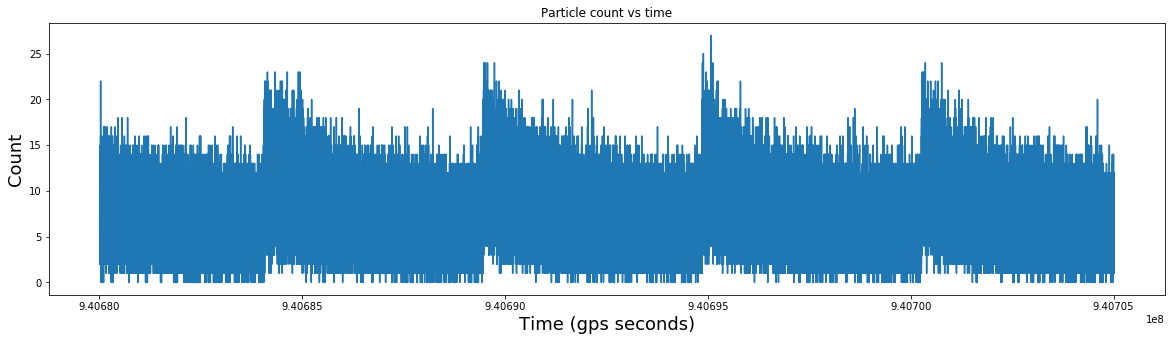

In [134]:
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.set_ylabel("Count", fontsize = 18)
ax.set_xlabel("Time (gps seconds)", fontsize = 18)
ax.plot(data[0,:][0:250000],data[3,:][0:250000])
ax.set_title("Particle count vs time")

$\textbf{3)}$ Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

Still trying to figure out how best to fit an exponential to this model, will finish up this part before submission is due.

Text(0.5, 1.0, 'Particle count vs time')

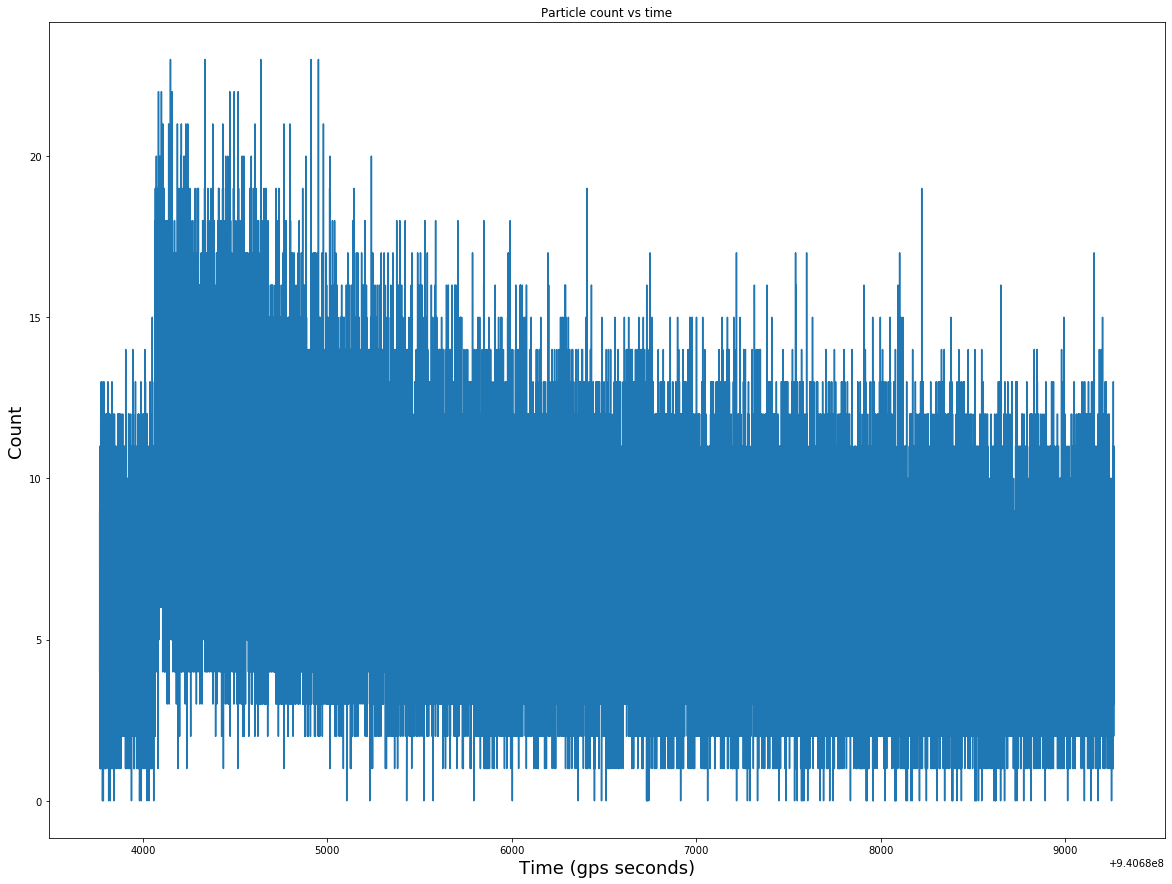

In [135]:
fig, ax = plt.subplots(1, 1)
#mean = np.
ax.set_ylabel("Count", fontsize = 18)
ax.set_xlabel("Time (gps seconds)", fontsize = 18)
ax.plot(data[0,:][37500:92500],data[3,:][37500:92500])
ax.set_title("Particle count vs time")
#x = np.arange(stats.expon.ppf(0.000001, loc = 4000, scale = mean),
              #stats.expon.ppf(0.999999, loc = 4000, scale = mean)) 
#ax.plot(x, stats.expon.pdf(x, loc = 3762720000000, scale = mean))
#data2 = (data[0,:][37500:92500], data[3,:][37500:92500])
#ax.plot(stats.expon.fit(data2))

$\textbf{4)}$ Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

At different times here really just means at different phases of the fit of the data, since it is clear that the data follows a repeating pattern as the satellite orbits. So, rather than thinking of it as time dependent, it can be simpler to think of it as simply being phase dependent. 

In [194]:
prob = stats.norm.cdf(5)
sigma = stats.poisson.ppf(prob, mean)
mean = np.mean(data[3,:][200:300])
solar_phase_mean = np.mean(data[1][200:300])
threshold = stats.poisson.ppf(prob, mean)
print("The 5 sigma threshold at a Solar phase of " + str(round(solar_phase_mean, 2)) + " is " + str(threshold))

The 5 sigma threshold at a Solar phase of 316.77 is 25.0


In [195]:
prob = stats.norm.cdf(5)
sigma = stats.poisson.ppf(prob, mean)
mean = np.mean(data[3,:][17500:17600])
solar_phase_mean = np.mean(data[1][17500:17600])
threshold = stats.poisson.ppf(prob, mean)
print("The 5 sigma threshold at a Solar phase of " + str(round(solar_phase_mean, 2)) + " is " + str(threshold))

The 5 sigma threshold at a Solar phase of 79.82 is 22.0


In [196]:
prob = stats.norm.cdf(5)
sigma = stats.poisson.ppf(prob, mean)
mean = np.mean(data[3,:][5628300:5628400])
solar_phase_mean = np.mean(data[1][5628300:5628400])
threshold = stats.poisson.ppf(prob, mean)
print("The 5 sigma threshold at a Solar phase of " + str(round(solar_phase_mean, 2)) + " is " + str(threshold))

The 5 sigma threshold at a Solar phase of 25.41 is 23.0


$\textbf{Problem 2}$

In [197]:
hf2 = h5py.File('images.h5', 'r')

In [198]:
hf2.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [199]:
data2 = np.array(hf2.get('image1'))
data3 = np.array(hf2.get('imagestack'))

Text(0.5, 1.0, 'probability')

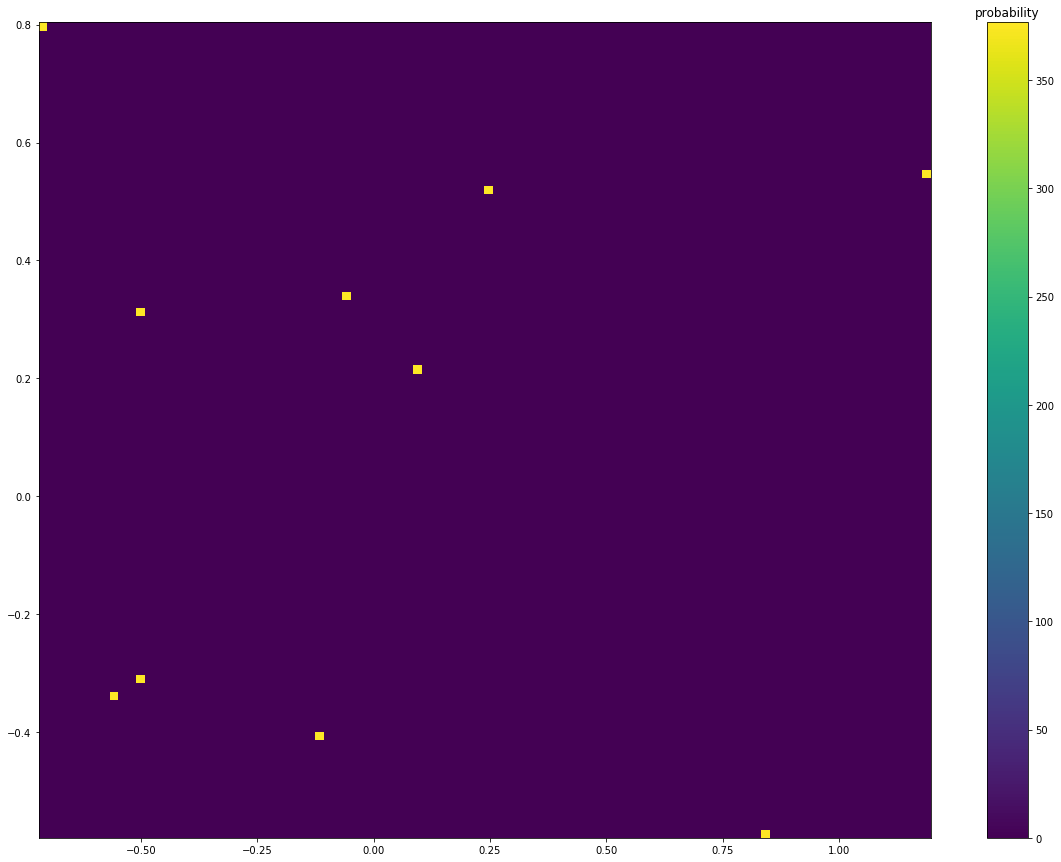

In [200]:
fig, ax = plt.subplots(1, 1)
plt.ylabel("", fontsize = 18)
plt.xlabel("", fontsize = 18)
plt.title("", fontsize=20)
a = np.vstack((data3[0], data3[0]))
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
clb = plt.colorbar(h[3], ax=ax)
clb.ax.set_title('probability')

This whole problem has been a nightmare for me, I just need to go to sleep and try and figure this out when I wake up. Sorry I wasn't able to complete it, I've gone through like 3 iterations and none of them make any sense so I just need to take a stab at this with a fresh mind tomorrow. 